# Hello, World!

A "Hello, World!" program is a simple computer program. It is the common starting point for learning a new langauge or environment. The program's purpose is typically to output the text "Hello, World!" to the console. The program serves to introduce syntax and basic structures that the learner will need going forward.

Here are a few "Hello, World!" example programs:

::: {.panel-tabset}

## Python

```python
# This is a comment
print("Hello, World!")
```

## C++

```cpp
#include <iostream>

int main() {
    // This is a comment
    std::cout << "Hello, World!" << std::endl;
    return 0;
}
```

## Julia

```julia
# This is a comment
println("Hello, World!")
```

## Fortran

```fortran
program hello
  ! This is a comment
  print *, 'Hello, World!'
end program hello
```
:::

However, our goal is to build models and run simulations. Therefore, our "Hello, World!" program serves that purpose. The program will solve the following differential equation.

$$
\dot{x} = -ax
$$

## Loading Packages

First, load all modules needed for the example for `ModelingToolkit.jl`.

In [2]:
using ModelingToolkit                # <1>
using ModelingToolkitStandardLibrary # <2>
using DifferentialEquations          # <3>
using Plots                          # <4>

1. Acausal modeling framework for building models
1. Collection of reusable component models commonly used in modeling various systems
1. State-of-the-art collection of differential equations solvers
1. Creating visualizations from simulation outputs

## Defining a Model

Next, the independent and dependent variables are defined.

Here, `t` is the independent variable representing time and `x` is a variable which depends on time, `t`.

In [3]:
@variables t x(t)

2-element Vector{Num}:
    t
 x(t)

An operator must also be defined which performs differentiation with respect to time, `t`.

In [4]:
D = Differential(t)

(::Differential) (generic function with 3 methods)

Model parameters are defined in a similar fashion. These are inputs not outputs.

In [5]:
@parameters a

1-element Vector{Num}:
 a

Create a system of ordinary differential equations, of type `ODESystem`, which consists of a single equation.

In [6]:
@named fol = ODESystem([D(x) ~ -a * x])

Model fol with 1 equations
States (1):
  x(t)
Parameters (1):
  a

## Setting up a Simulation

Now that a system or _model_ exists, we must describe a simulation that we want to perform on this model. We call this a problem, and assign it to type `ODEProblem`.

There are several inputs we can use to create the problem we wish to study - to start, only consider the ordered arguments shown below:

1. **model** which has type `ODESystem`
1. **initial conditions** which is represented by a `Pair`[^pair]
1. **time span** which is represented by a `Tuple`[^tuple]
1. **parameter values** which again is represented by a `Pair`

In [7]:
prob = ODEProblem(fol, [x => 1.0], (0.0, 5.0), [a => 1.0])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 1.0

Once a problem has been defined, we use the common `solve` interface. In this simple example, only 1 argument is provided - the `ODEProblem`.

In [8]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 12-element Vector{Float64}:
 0.0
 0.10001999200479662
 0.34208427873632274
 0.6553980290285384
 1.0312652902321524
 1.4709406498424789
 1.9659577002710475
 2.5116828197051655
 3.1005131845932916
 3.7267802882369727
 4.384652335738251
 5.0
u: 12-element Vector{Vector{Float64}}:
 [1.0]
 [0.9048193287657775]
 [0.7102883564034526]
 [0.5192354320104403]
 [0.35655575232768827]
 [0.2297097760377978]
 [0.1400224680615468]
 [0.08113256081377467]
 [0.04502714038509206]
 [0.024071202553369336]
 [0.012468055449568477]
 [0.006738503575110172]

In [9]:
sol isa ODESolution

true

## Visualizing Results

Finally, we want to create a graph using the data from our solution. This is very easy since there exists a plotting recipe specifically for `ODESolution` objects (which you can see from above is exactly the type produces by the `solve` function).

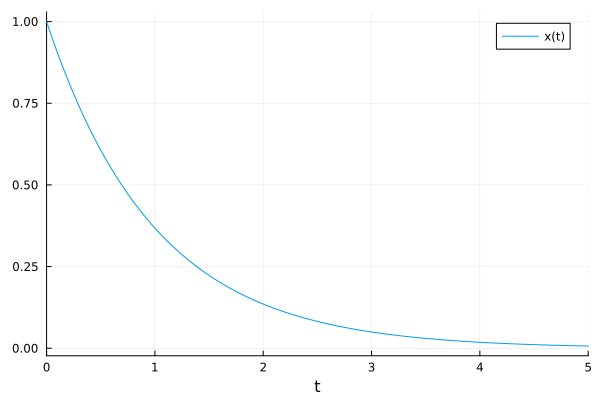

In [10]:
plot(sol)

That was easy! There is only one output plotted because there was only one dependent variable in our model. When working with larger models, specify which variables should be plotted by providing a list to the `idxs` keyword argument (along with any other [attributes](https://docs.juliaplots.org/latest/attributes/) you want to modify).

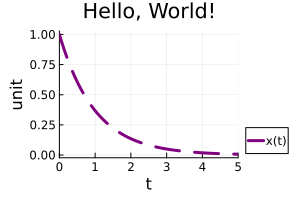

In [13]:
plot(
    sol;
    idxs=[x],
    size=(300,200),
    title="Hello, World!",
    ylabel="unit",
    legend=:outerbottomright,
    color=:purple,
    linewidth=3,
    linestyle=:dash
)

## Summary

We just loaded packages, defined a model, ran a simulation and visualized results. Although this example model is simple, many workflows will require these same steps.

[^pair]: In Julia, a `Pair` is a collection of two elements. A `Pair` has fields `first` and `second` for accessing each element. To construct a `Pair`, the sytax is `[first => second]` (notice the surrounding square brackets).
[^tuple]: In Julia, a `Tuple` is a collection of any number of elements. Accessing elements of a `Tuple` is only possible using their index as a `Tuple` does not have field names. To construct a `Tuple`, the syntax is `(1, 'b', pi)`(notice the surrounding parentheses).